<a href="https://colab.research.google.com/github/L-lovat/NeuromatchProject/blob/main/ProjectECoG_faceshouses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading of Miller ECoG data of faces/houses (+ noise)

includes some visualizations

In [1]:
# @title Data retrieval
import os, requests

fname = 'faceshouses.npz'
url = "https://osf.io/argh7/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [2]:
# @title Install packages (`nilearn`, `nimare`), import `matplotlib` and set defaults
# install packages to visualize brains and electrode locations
!pip install nilearn --quiet
!pip install nimare --quiet

from matplotlib import rcParams
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 4.6 MB/s eta 0:00:00


In [3]:
# @title Data loading
import numpy as np

alldat = np.load(fname, allow_pickle=True)['dat']

# select just one of the recordings here.
dat1 = alldat[1][0]
dat2 = alldat[0][1]



In [4]:
N_subj, N_exp = alldat.shape
print(N_subj, N_exp)
subjects1 = []
subjects2 = []
for subj in range(N_subj):
  subjects1.append(alldat[subj, 0])
  subjects2.append(alldat[subj, 1])
  print(f"subject {subj} has {alldat[subj, 0].get('locs').shape[0]} electrodes implented")

i=0
for subject in subjects1:
  #print(i)
  for key in subject.keys():
    ln = len(subject[key]) if type(subject[key]) == type([]) else None
    ln = subject[key].shape if ln is None and type(subject[key]) == type(np.array([])) else ln
    #print(f"\t{key} : {type(subject[key])} - {ln}")
  i += 1

i=0
for subject in subjects2:
  #print(i)
  for key in subject.keys():
    ln = len(subject[key]) if type(subject[key]) == type([]) else None
    ln = subject[key].shape if ln is None and type(subject[key]) == type(np.array([])) else ln
    #print(f"\t{key} : {type(subject[key])} - {ln}")
  i += 1

7 2
subject 0 has 41 electrodes implented
subject 1 has 50 electrodes implented
subject 2 has 39 electrodes implented
subject 3 has 60 electrodes implented
subject 4 has 58 electrodes implented
subject 5 has 39 electrodes implented
subject 6 has 58 electrodes implented


0, Counter({'Brodmann area 19': 5, 'Brodmann area 37': 4, 'Brodmann area 20': 3, 'Brodmann area 28': 3, 'Brodmann area 18': 3, 'Brodmann area 10': 2, 'Brodmann area 32': 2, 'Corpus Callosum': 2, 'Amygdala': 2, 'Brodmann area 47': 2, 'Brodmann area 34': 2, 'Brodmann area 38': 2, 'Brodmann area 21': 2, 'Brodmann area 30': 2, 'Brodmann area 36': 2, 'Brodmann area 13': 1, 'Hippocampus': 1, 'Brodmann area 22': 1})
1, Counter({'Brodmann area 11': 15, 'Brodmann area 38': 7, 'Brodmann area 20': 6, 'Brodmann area 10': 4, 'Brodmann area 46': 3, 'Brodmann area 28': 3, 'Brodmann area 18': 3, 'Brodmann area 37': 3, 'Brodmann area 47': 2, 'Brodmann area 19': 2, 'Brodmann area 35': 1, 'Brodmann area 36': 1})
2, Counter({'Brodmann area 22': 11, 'Dentate': 8, 'Brodmann area 40': 5, 'Brodmann area 11': 4, 'Brodmann area 47': 3, 'Brodmann area 28': 2, 'Brodmann area 43': 2, 'Brodmann area 38': 1, 'Brodmann area 36': 1, 'Brodmann area 37': 1, 'Brodmann area 20': 1})
3, Counter({'Caudate Head': 23, 'Brodma

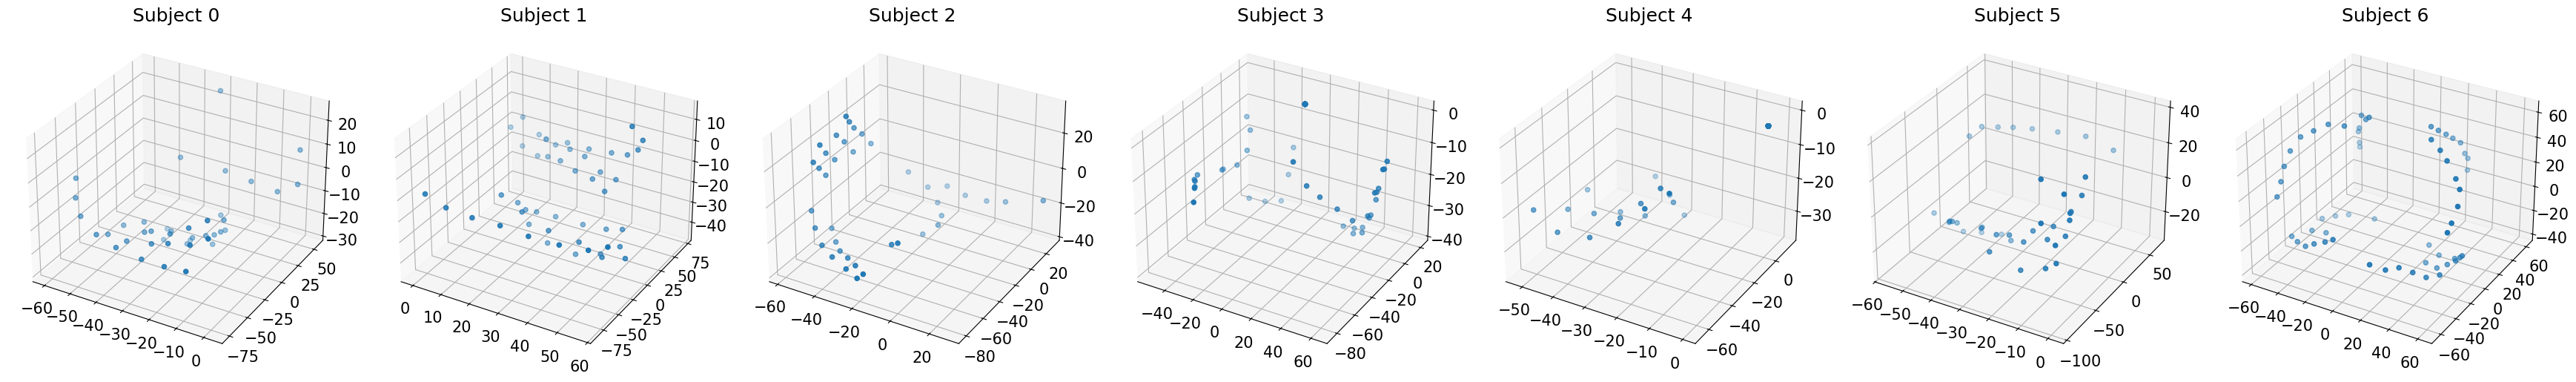

In [5]:
import matplotlib.pyplot as plt
from collections import Counter


fig = plt.figure(figsize=(5 * len(subjects1), 5))  # Adjust the size as needed

for i, subject in enumerate(subjects1):
    counts = Counter(subject["Brodmann_Area"])
    print(f"{i}, {counts}")
    ax = fig.add_subplot(1, len(subjects1), i + 1, projection='3d')
    ax.scatter(subject["locs"][:, 0], subject["locs"][:, 1], subject["locs"][:, 2])
    ax.set_title(f"Subject {i}")

plt.tight_layout()
plt.show()


# Dataset info #

This is one of multiple ECoG datasets from Miller 2019, recorded in a clinical settings with a variety of tasks. We plan to curate a few more before NMA starts. Raw data here:

https://exhibits.stanford.edu/data/catalog/zk881ps0522

`alldat` contains 7 subjects each with two sessions `dat1` and `dat2`, and was originally used in these publications:

*Miller, Kai J., et al. "Face percept formation in human ventral temporal cortex." Journal of neurophysiology 118.5 (2017): 2614-2627.*

*Miller, Kai J., et al. "The physiology of perception in human temporal lobe is specialized for contextual novelty." Journal of neurophysiology 114.1 (2015): 256-263.*

*Miller, Kai J., et al. "Spontaneous decoding of the timing and content of human object perception from cortical surface recordings reveals complementary information in the event-related potential and broadband spectral change." PLoS computational biology 12.1 (2016): e1004660.*

*Miller, Kai J., et al. "The physiology of perception in human temporal lobe is specialized for contextual novelty." Journal of neurophysiology 114.1 (2015): 256-263.*

*Miller, Kai J., et al. "Spontaneous decoding of the timing and content of human object perception from cortical surface recordings reveals complementary information in the event-related potential and broadband spectral change." PLoS computational biology 12.1 (2016): e1004660.*

In this task, subjects in a clinical settings (with ECoG implants) are passively shown faces and house during the first experiment (`dat1`). Then in the second experiment in the same subjects (`dat2`), noise is added to face and houses images and the subject has to detect the faces by pressing a key. Two of the subjects don't have keypresses.

Sample rate is always 1000Hz, and the ECoG data has been notch-filtered at 60, 120, 180, 240 and 250Hz, followed by z-scoring across time and conversion to float16 to minimize size.

Experiment 1:
* `dat1['V']`: continuous voltage data (time by channels)
* `dat1['srate']`: acquisition rate (1000 Hz). All stimulus times are in units of this.  
* `dat1['t_on']`: time of stimulus onset in data samples
* `dat1['t_off']`: time of stimulus offset, always 400 samples after `t_on`
* `dat1['stim_id`]: identity of stimulus from 1-100, with 1-50 being houses and 51-100 being faces
* `dat1['locs`]: 3D electrode positions on the brain surface

Experiment 2:
* `dat2['V`]: continuous voltage data (time by channels)
* `dat2['srate']`: acquisition rate (1000 Hz). All stimulus times are in units of this.  
* `dat2['t_on']`: time of stimulus onset in data samples
* `dat2['t_off']`: time of stimulus offset, always 1000 samples after `t_on`, with no inter-stimulus interval
* `dat2['stim_id`]: identity of stimulus from 1-600 (not really useful, since we don't know which ones are the same house/face)
* `dat2['stim_cat']`: stimulus category (1 = house, 2 = face)
* `dat2['stim_noise']`: percent noise from 0 to 100
* `dat2['key_press']`: when the subject thought the image was a face
* `dat2['categories']`: categories legend (1 = house, 2 = face)
* `dat2['locs`]: 3D electrode positions on the brain surface


Subject 0 :
	Face response : Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 18'): 2, np.str_('Brodmann area 30'): 1, np.str_('Brodmann area 37'): 1})
	14.63% of channels ([23 29 31 33 34 35])
	House response : Counter({np.str_('Brodmann area 19'): 3, np.str_('Brodmann area 18'): 2, np.str_('Brodmann area 36'): 1})
	14.63% of channels ([25 29 30 33 34 35])


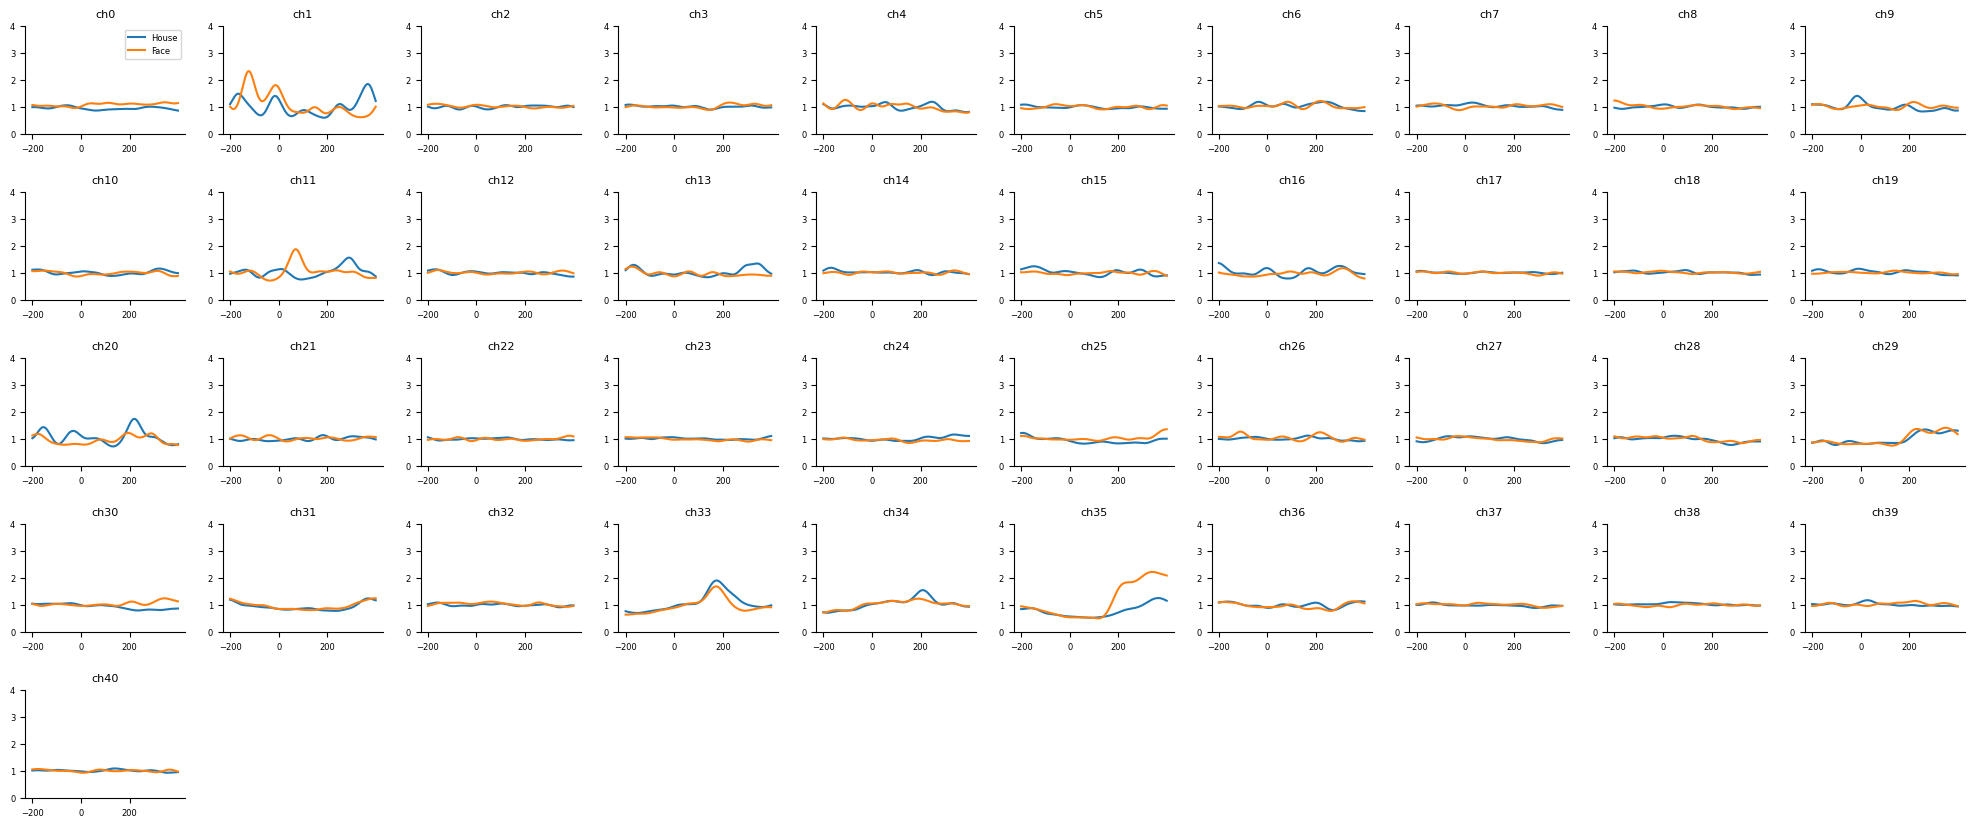

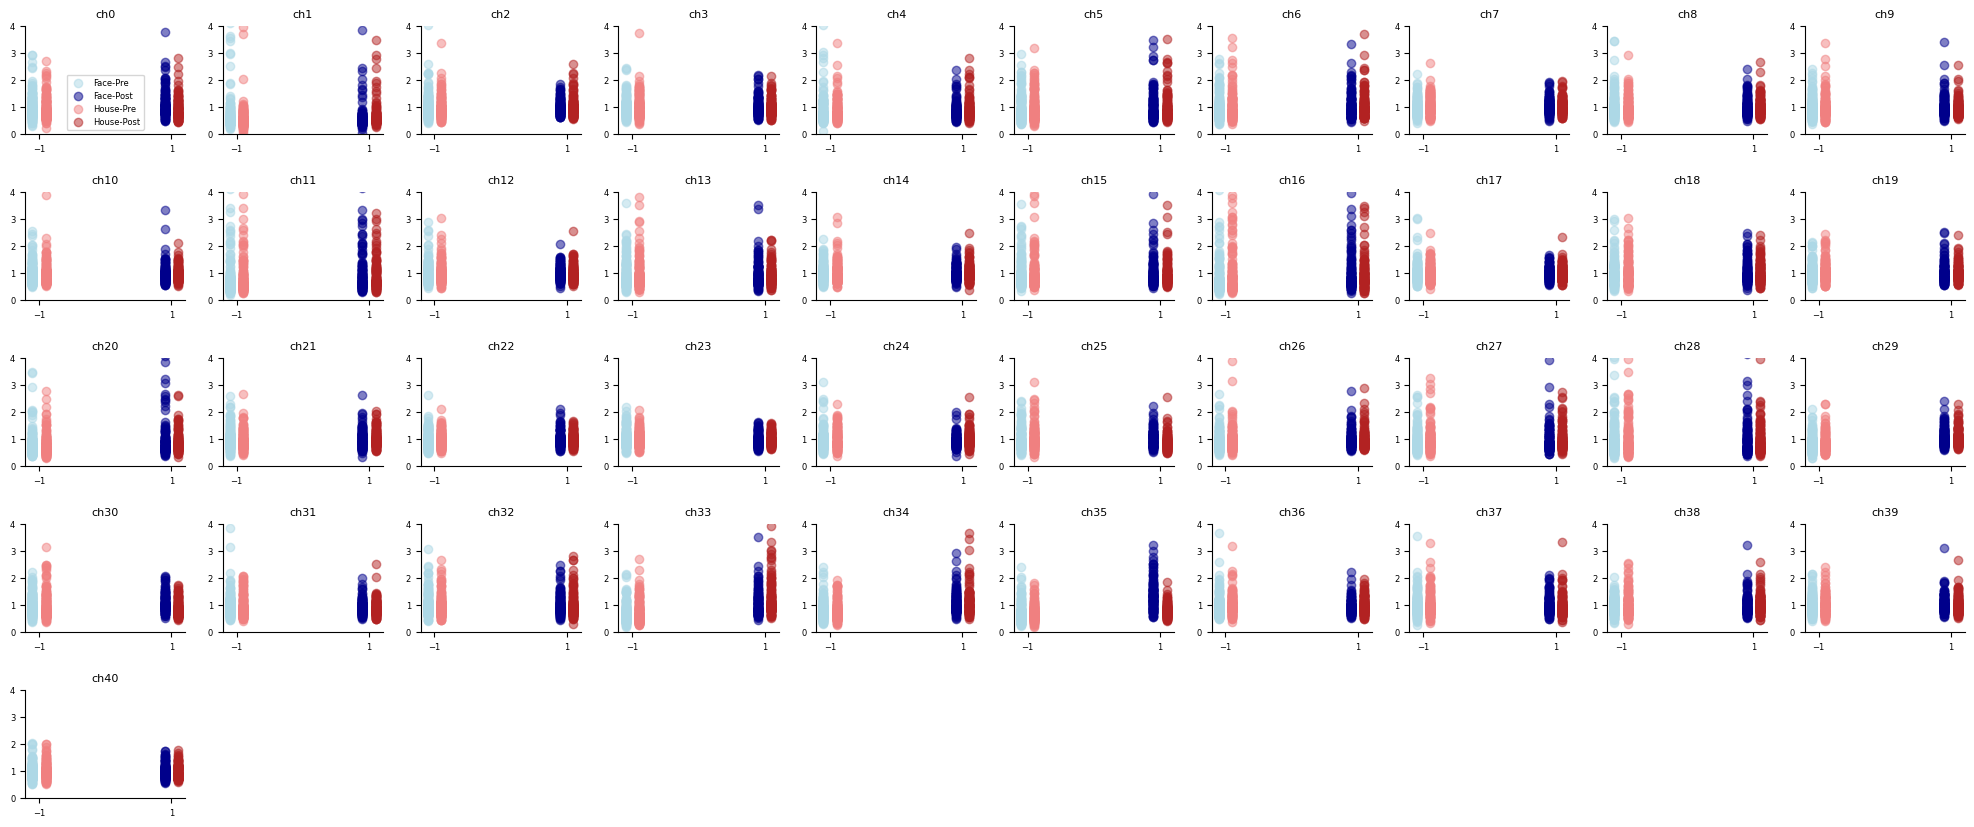

Subject 1 :
	Face response : Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 37'): 2})
	6.67% of channels ([20 22 23 24])
	House response : Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 37'): 1})
	5.00% of channels ([20 21 23])


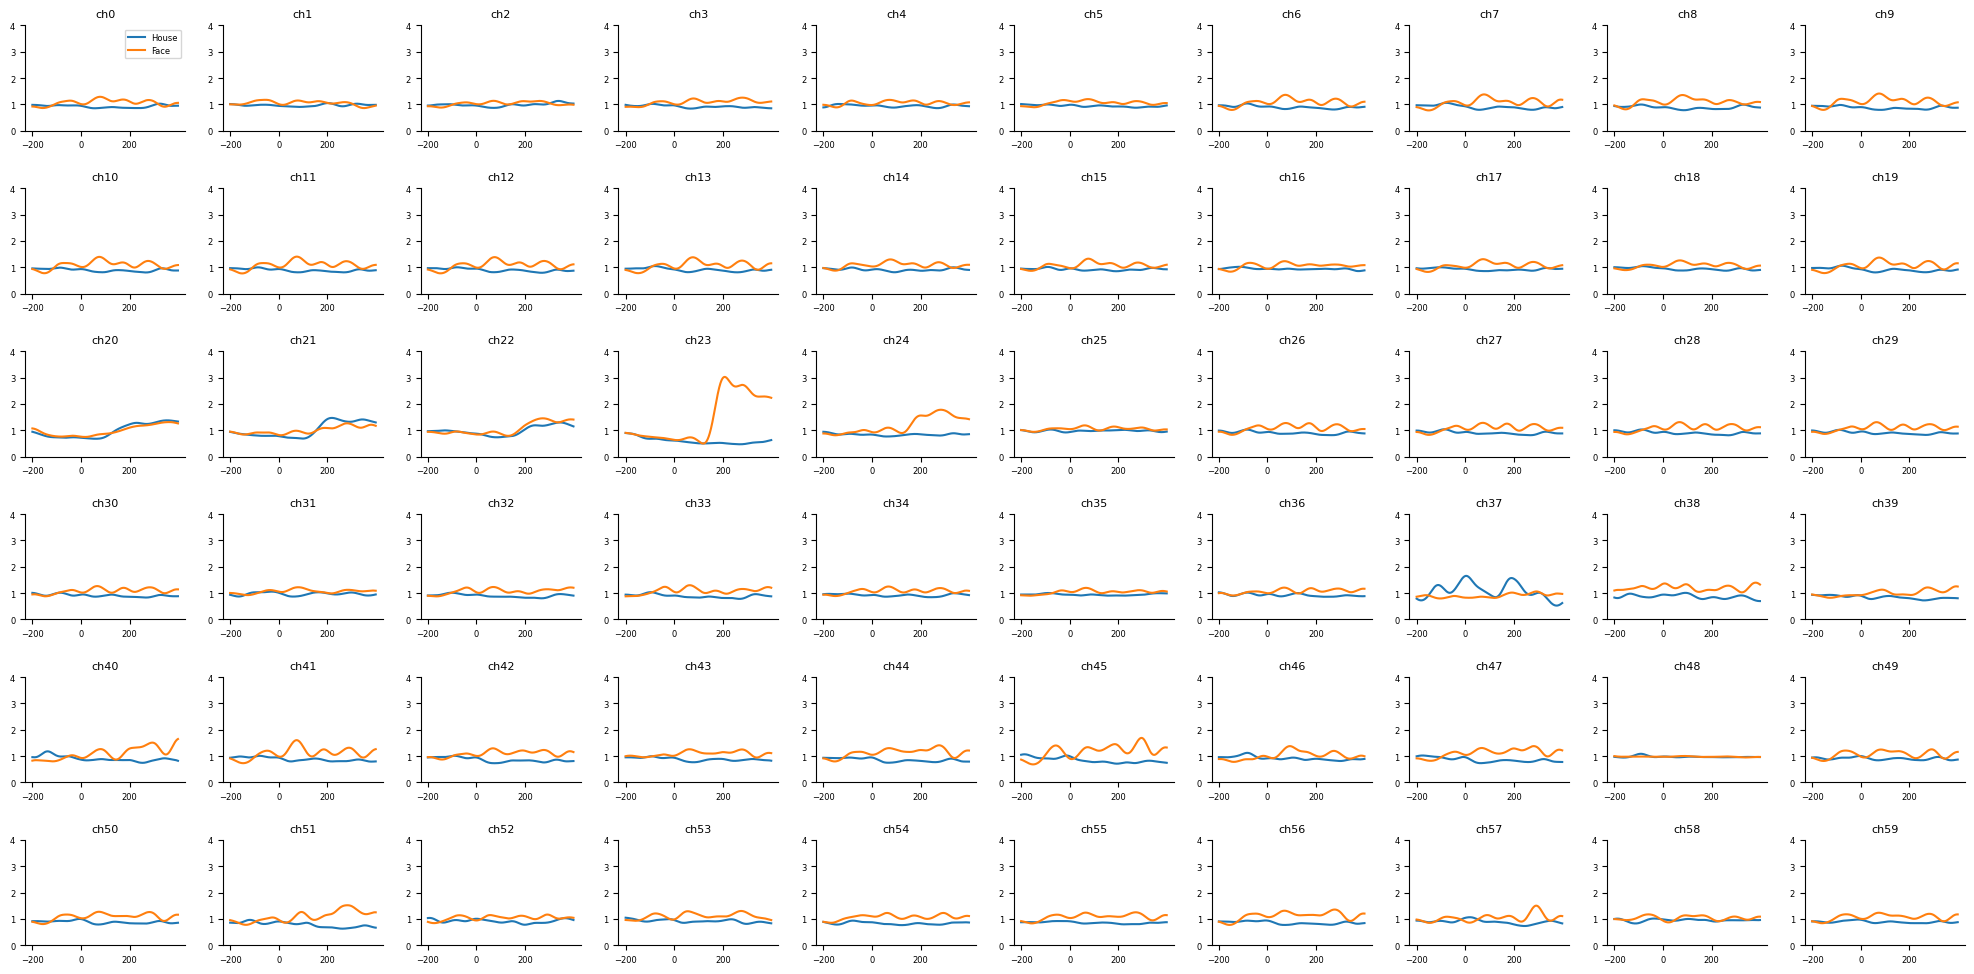

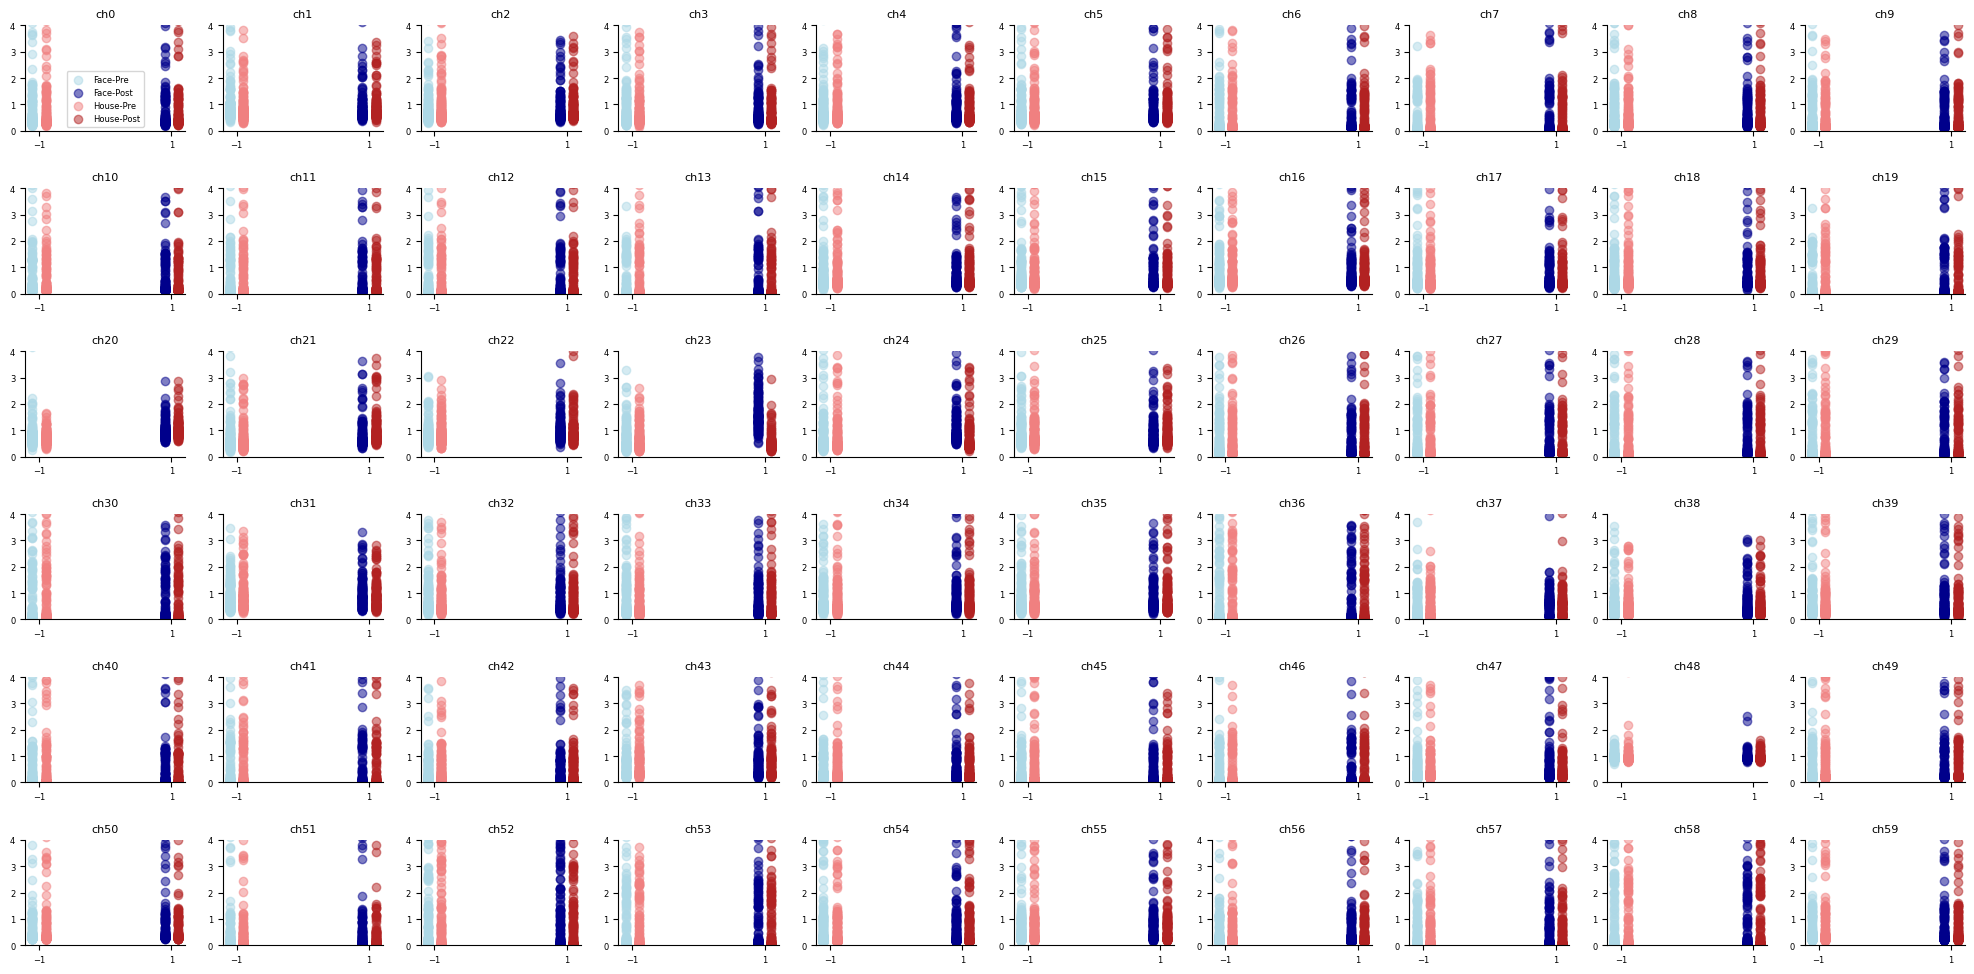

Subject 2 :
	Face response : Counter({np.str_('Brodmann area 19'): 1})
	1.72% of channels ([15])
	House response : Counter({np.str_('Brodmann area 19'): 1})
	1.72% of channels ([14])


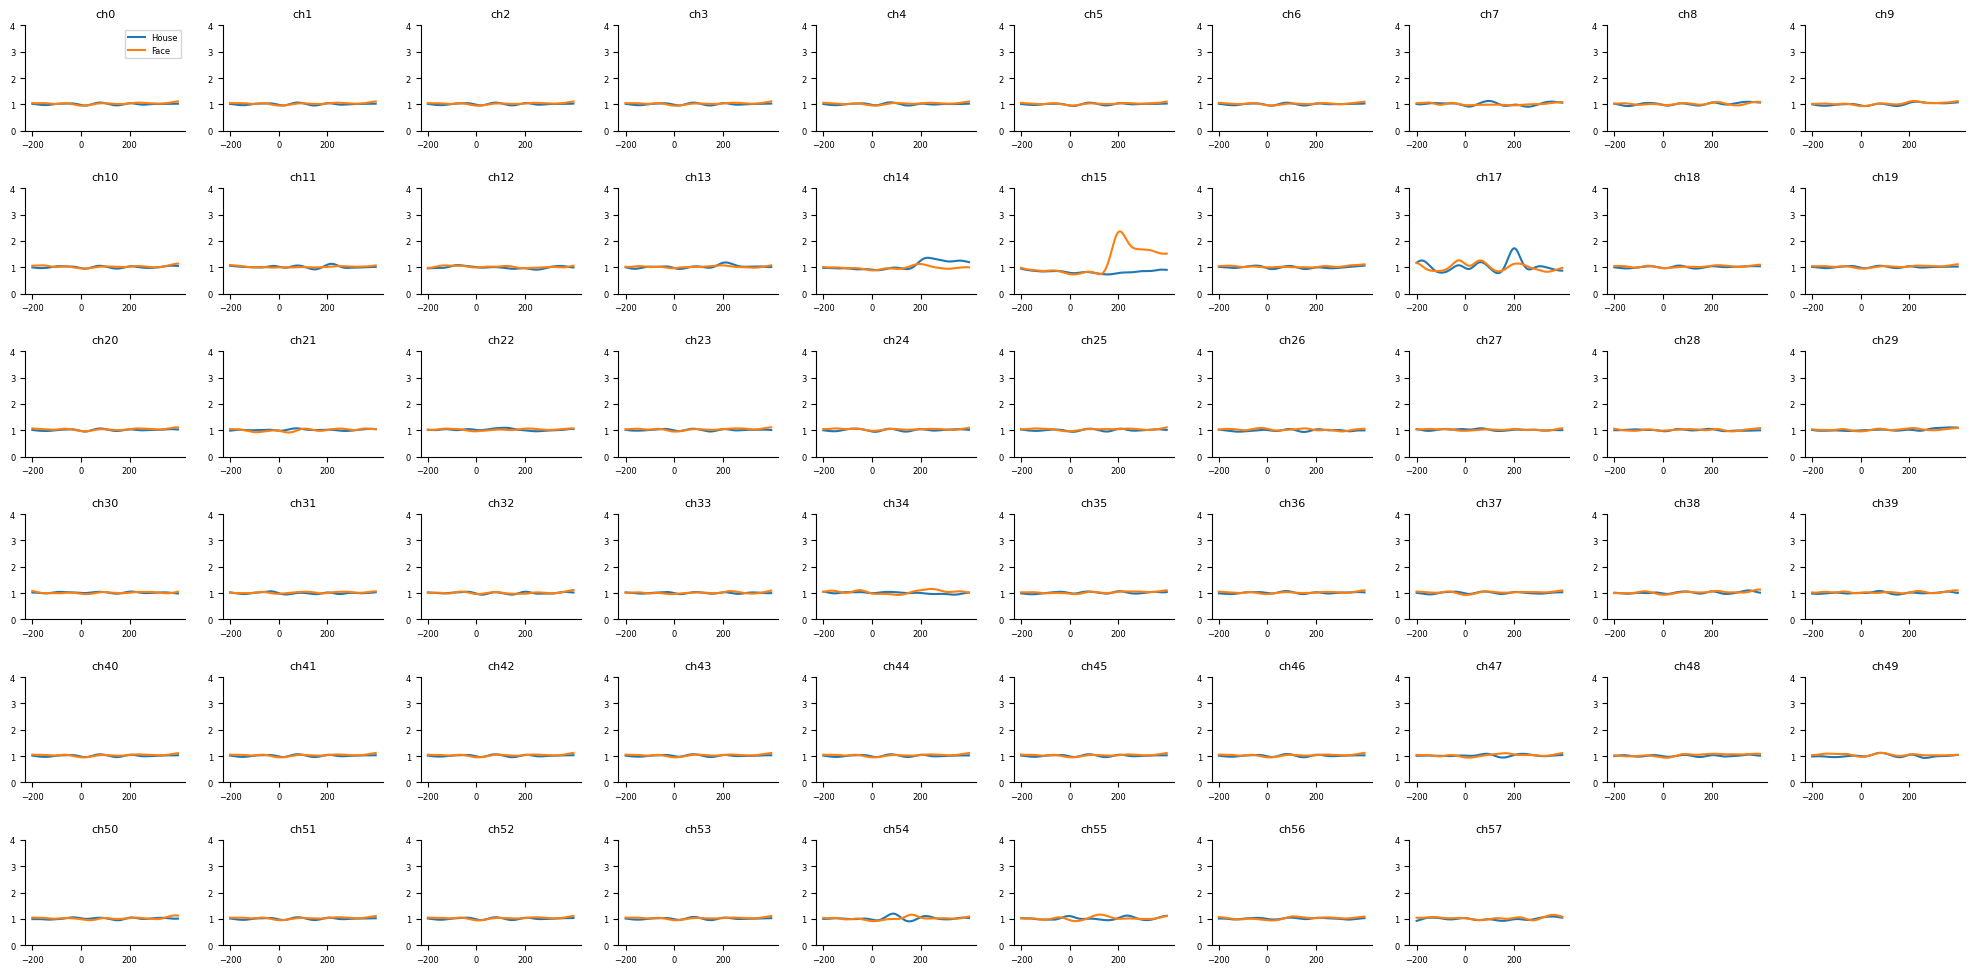

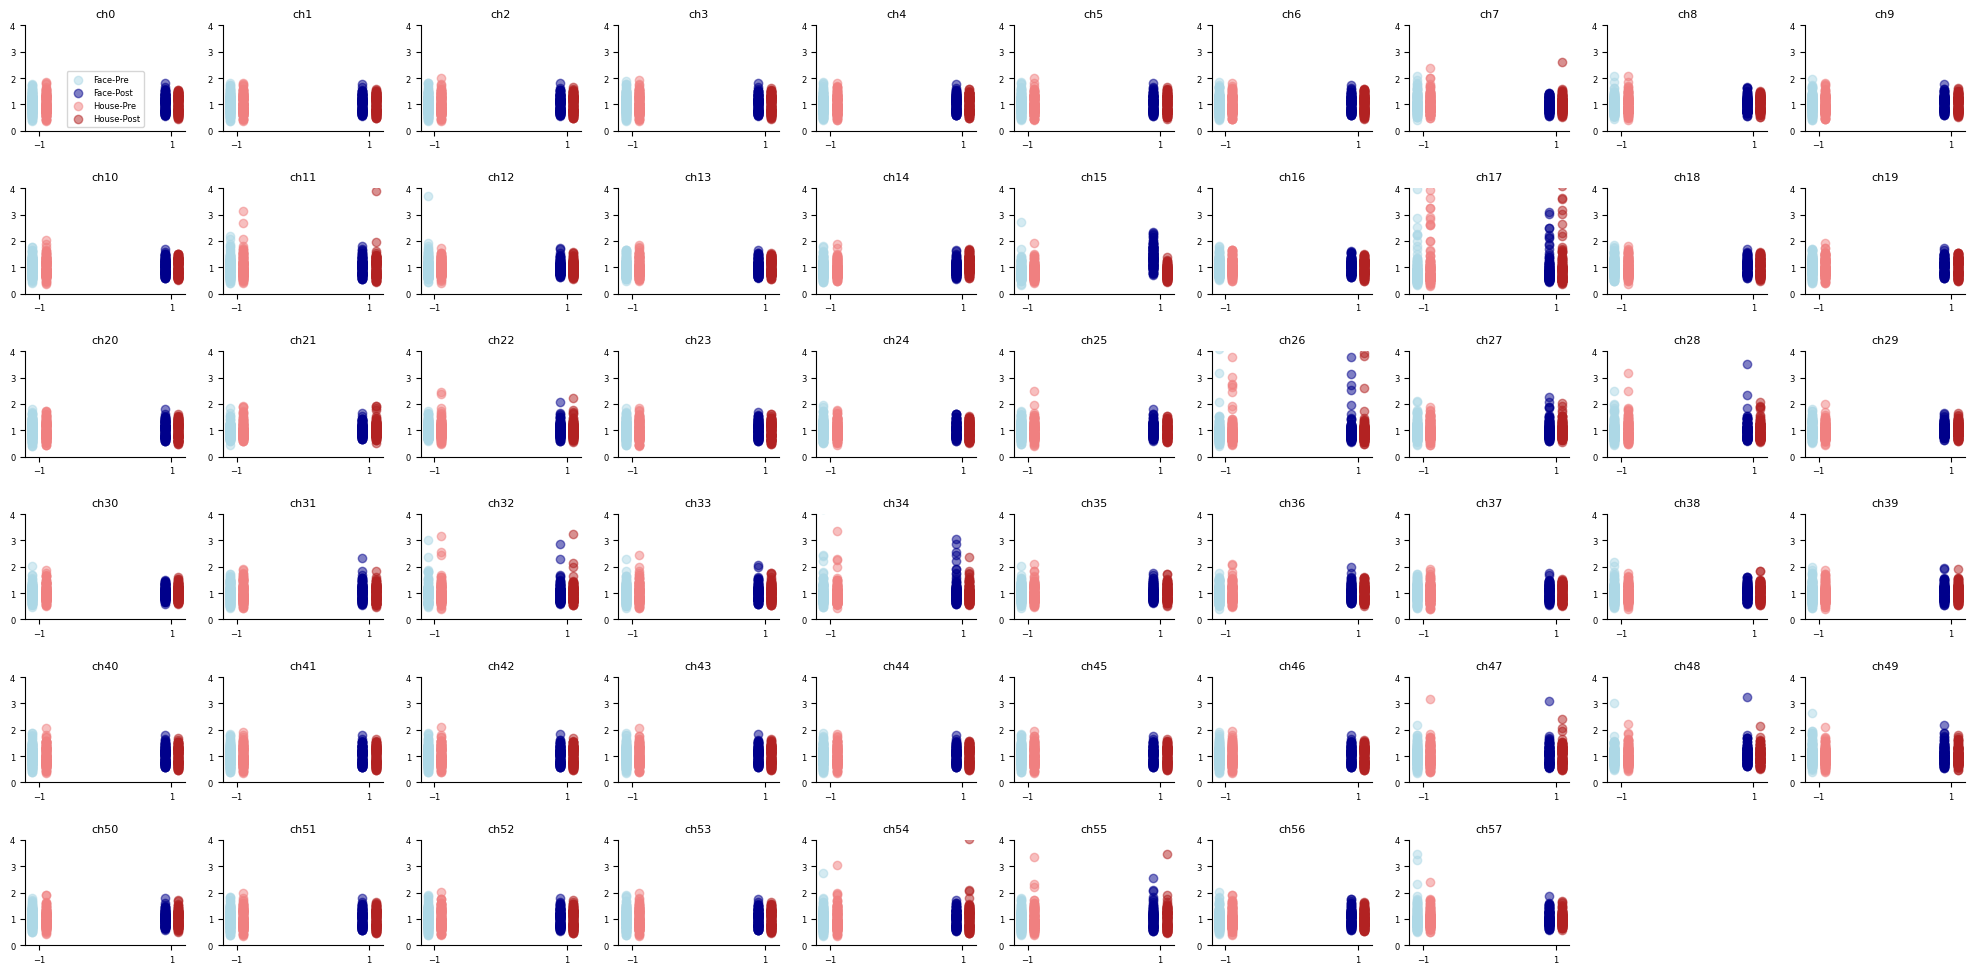

Subject 3 :
	Face response : Counter({np.str_('Brodmann area 18'): 4, np.str_('Brodmann area 37'): 1, np.str_('Brodmann area 17'): 1, np.str_('Brodmann area 19'): 1, np.str_('Brodmann area 30'): 1})
	20.51% of channels ([23 24 25 26 27 28 30 34])
	House response : Counter({np.str_('Brodmann area 18'): 4, np.str_('Brodmann area 36'): 1, np.str_('Brodmann area 17'): 1, np.str_('Brodmann area 19'): 1})
	17.95% of channels ([13 24 26 27 28 29 30])


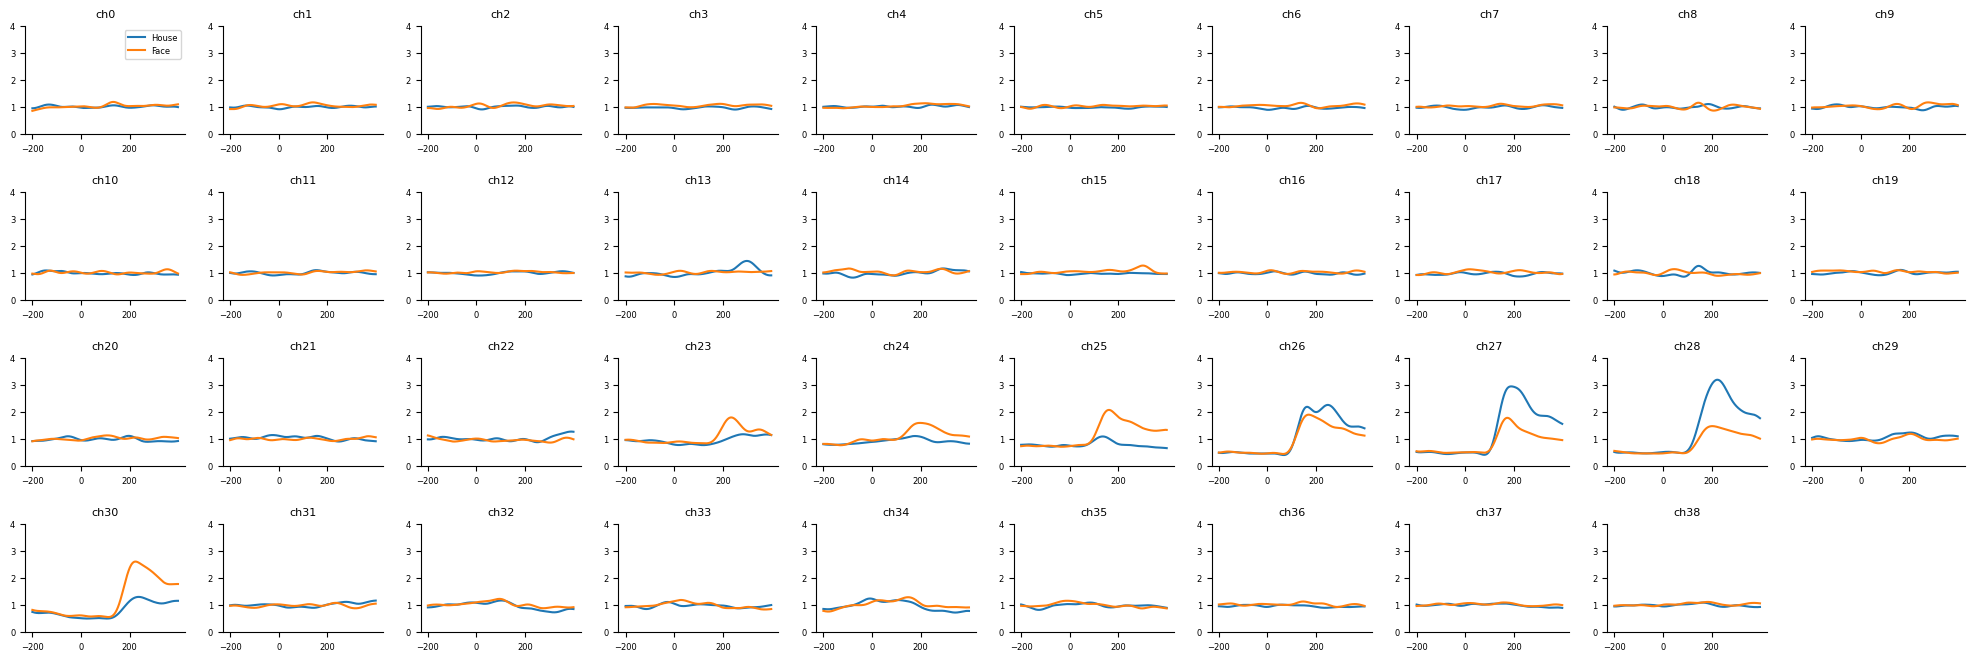

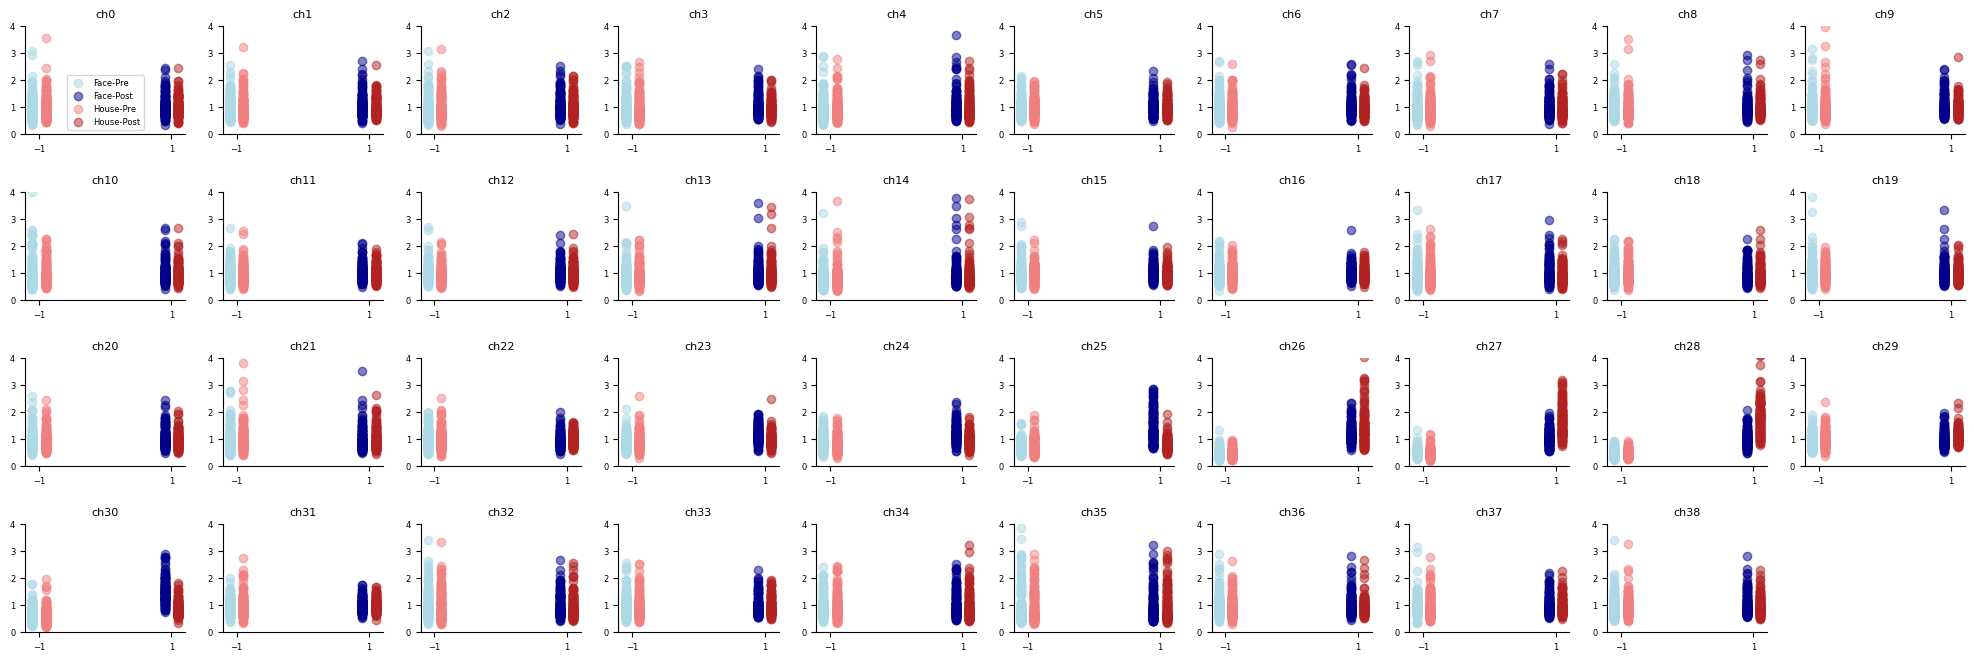

Subject 4 :
	Face response : Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 37'): 2})
	6.90% of channels ([ 8  9 36 38])
	House response : Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 37'): 1})
	5.17% of channels ([ 9 36 37])


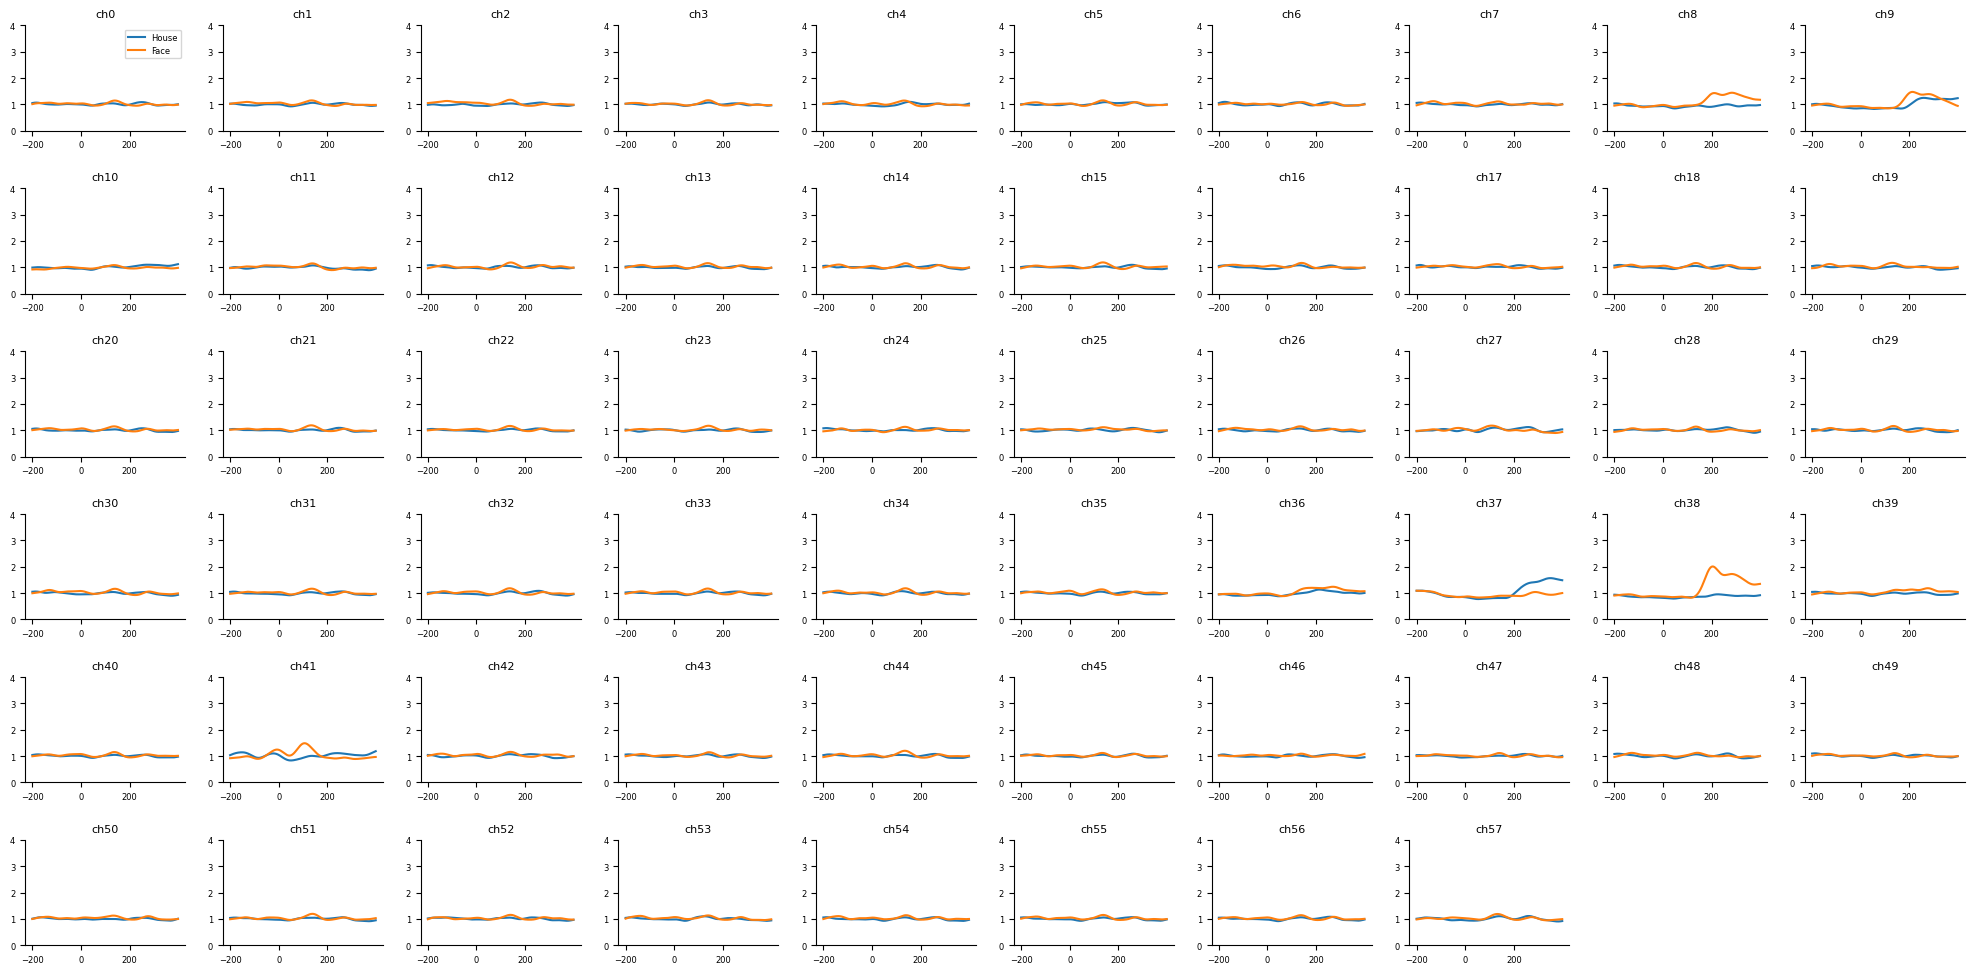

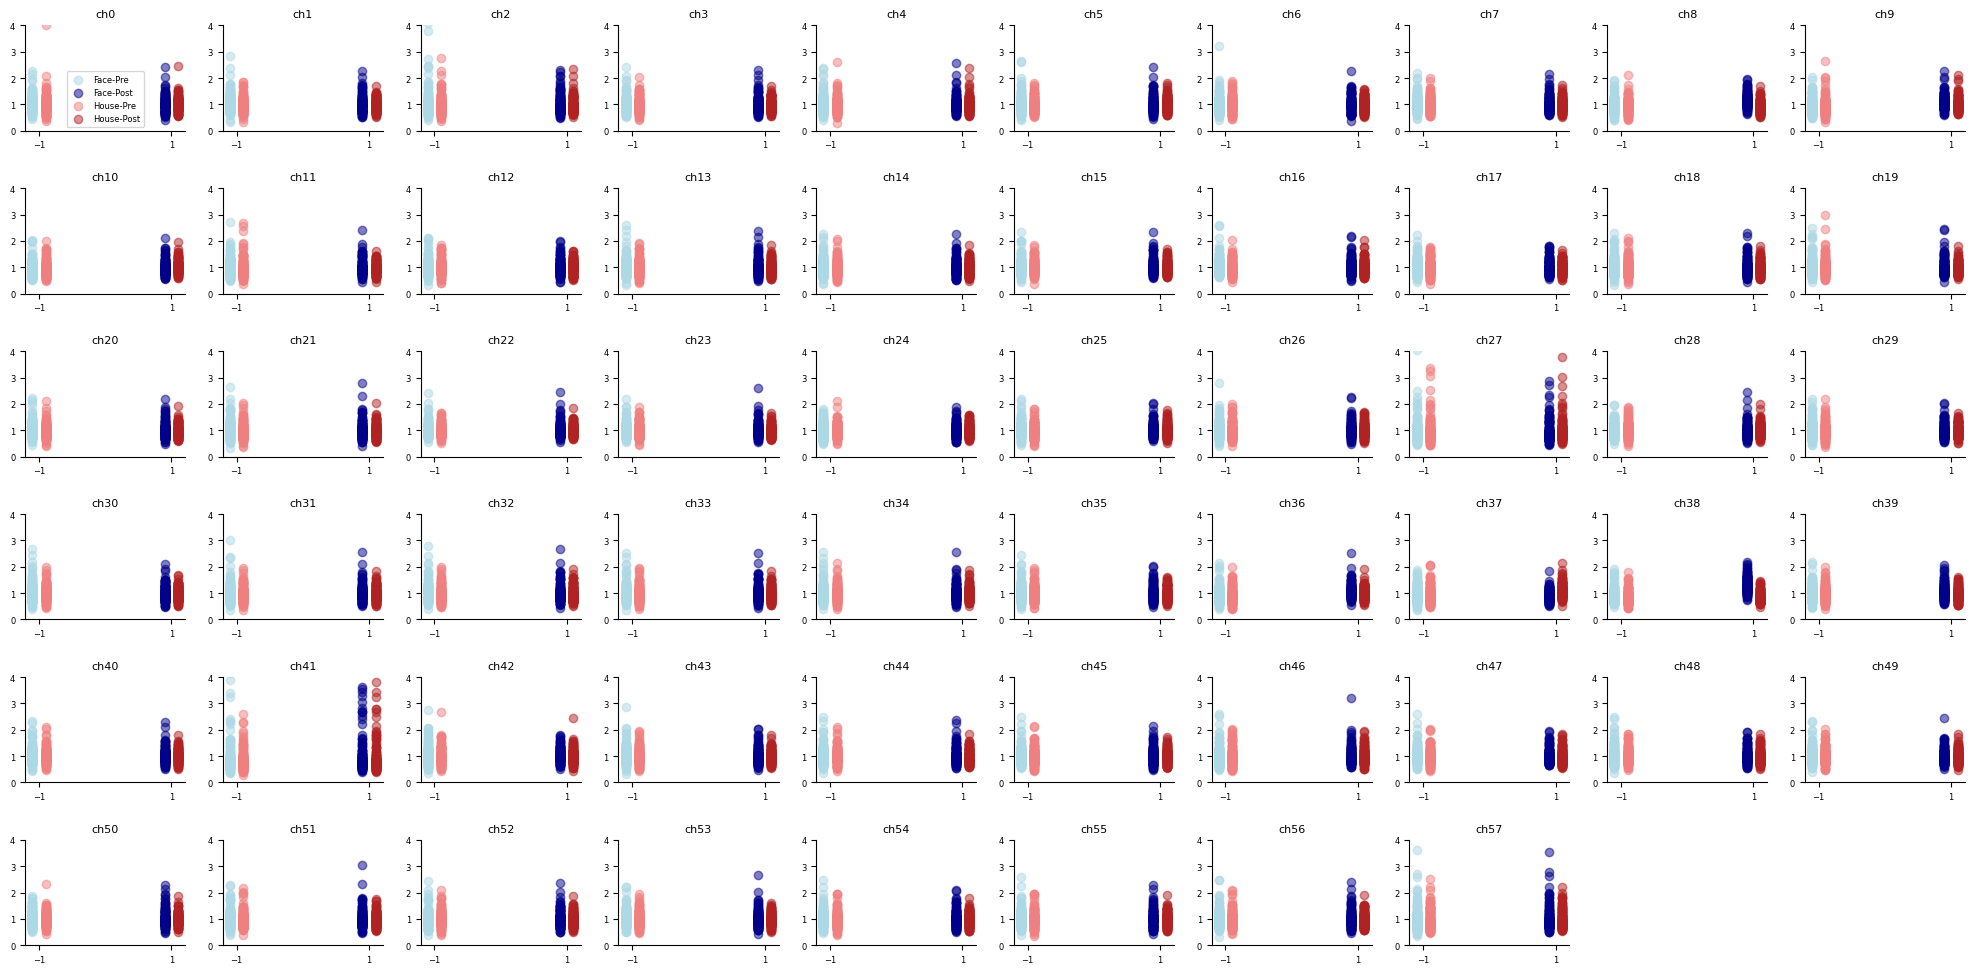

In [6]:
from scipy import signal
import numpy as np
from collections import Counter
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

active_areas_face = []
active_areas_house = []
subjects1_kept = [subjects1[j] for j in [0,3,4,5,6]]
for i, subject in enumerate(subjects1_kept):
    V = subject['V'].astype('float32')

    # High-pass filter at 50 Hz
    b, a = signal.butter(3, [50], btype='high', fs=1000)
    V = signal.filtfilt(b, a, V, axis=0)

    # Compute power (rectification and squaring)
    V = np.abs(V)**2

    # Normalize over full signal (optional)
    V /= np.mean(V, axis=0)

    # Low-pass filter at 10 Hz
    b, a = signal.butter(3, [10], btype='low', fs=1000)
    V = signal.filtfilt(b, a, V, axis=0)

    nt, nchan = V.shape
    nstim = len(subject['t_on'])

    # Build epochs around each stimulus onset
    trange = np.arange(-200, 400)  # 600 ms window
    ts = subject['t_on'][:, np.newaxis] + trange
    V_epochs = V[ts, :]  # shape (nstim, 600, nchan)

    # Pre/post slices (indices relative to epoch window)
    pre_idx = slice(0, 200)    # -200 ms to 0 ms
    post_idx = slice(200, 600) # 0 ms to +400 ms

    # Identify face and house trials
    face_trials = subject['stim_id'] > 50
    house_trials = subject['stim_id'] <= 50

    # Extract pre and post stimulus data per trial and channel
    pre_face = V_epochs[face_trials, pre_idx, :]   # shape (n_face_trials, 200, nchan)
    post_face = V_epochs[face_trials, post_idx, :] # shape (n_face_trials, 400, nchan)

    pre_house = V_epochs[house_trials, pre_idx, :]
    post_house = V_epochs[house_trials, post_idx, :]

    # Compute mean power over time window, per trial and channel
    pre_face_mean = pre_face.mean(axis=1)   # shape (n_face_trials, nchan)
    post_face_mean = post_face.mean(axis=1) # shape (n_face_trials, nchan)
    pre_house_mean = pre_house.mean(axis=1)
    post_house_mean = post_house.mean(axis=1)

    # Initialize result arrays
    increase_face = np.zeros(nchan, dtype=bool)
    increase_house = np.zeros(nchan, dtype=bool)
    pval_threshold = 0.05

    # For each channel, test if post-stimulus power is significantly different from pre-stimulus power
    for ch in range(nchan):
        if len(pre_face_mean) > 0:
            try:
                #stat_face, pval_face = wilcoxon(post_face_mean[:, ch], pre_face_mean[:, ch])
                stat_face, pval_face = ttest_ind(post_face_mean[:, ch], pre_face_mean[:, ch], equal_var=False)
                increase_face[ch] = pval_face < pval_threshold
            except ValueError:
                increase_face[ch] = False
        else:
            increase_face[ch] = False

        if len(pre_house_mean) > 0:
            try:
                #stat_house, pval_house = wilcoxon(post_house_mean[:, ch], pre_house_mean[:, ch])
                stat_house, pval_house = ttest_ind(post_house_mean[:, ch], pre_house_mean[:, ch], equal_var=False)
                increase_house[ch] = pval_house < pval_threshold
            except ValueError:
                increase_house[ch] = False
        else:
            increase_house[ch] = False

    # Get Brodmann areas
    triggered_areas_face = np.array(subject['Brodmann_Area'])[increase_face]
    triggered_areas_house = np.array(subject['Brodmann_Area'])[increase_house]

    counts_face = Counter(triggered_areas_face)
    counts_house = Counter(triggered_areas_house)

    active_areas_face.append(counts_face)
    active_areas_house.append(counts_house)

    print(f"Subject {i} :")
    print(f"\tFace response : {counts_face}\n\t{len(triggered_areas_face)/nchan:.2%} of channels ({np.arange(nchan)[increase_face]})")
    print(f"\tHouse response : {counts_house}\n\t{len(triggered_areas_house)/nchan:.2%} of channels ({np.arange(nchan)[increase_house]})")


    # Plot average response per channel for faces and houses
    V_house_avg = V_epochs[house_trials].mean(axis=0)  # shape (600, nchan)
    V_face_avg = V_epochs[face_trials].mean(axis=0)

    plt.figure(figsize=(20, 10))
    for j in range(nchan):
        ax = plt.subplot(6, 10, j + 1)
        plt.plot(trange, V_house_avg[:, j], label='House')
        plt.plot(trange, V_face_avg[:, j], label='Face')
        plt.title(f'ch{j}', fontsize=8)
        plt.xticks([-200, 0, 200])
        plt.ylim([0, 4])
        plt.tick_params(labelsize=6)
        if j == 0:
            plt.legend(fontsize=6)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(20, 10))
    for j in range(nchan):
        ax = plt.subplot(6, 10, j + 1)
        plt.scatter(-np.ones(pre_face_mean.shape[0])-.1, pre_face_mean[:, j], label='Face-Pre', color="lightblue", alpha=0.5)
        plt.scatter(np.ones(post_face_mean.shape[0])-.1, post_face_mean[:, j], label='Face-Post', color="darkblue", alpha=0.5)
        plt.scatter(-np.ones(pre_house_mean.shape[0])+.1, pre_house_mean[:, j], label='House-Pre', color="lightcoral", alpha=0.5)
        plt.scatter(np.ones(post_house_mean.shape[0])+.1, post_house_mean[:, j], label='House-Post', color="firebrick", alpha=0.5)
        plt.title(f'ch{j}', fontsize=8)
        plt.xticks([-1, 1])
        plt.ylim([0, 4])
        plt.tick_params(labelsize=6)
        if j == 0:
            plt.legend(fontsize=6)
    plt.tight_layout()
    plt.show()


In [7]:
N_subj = len(subjects1_kept)
for i in range(N_subj):
  print(active_areas_face[i] )

Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 18'): 2, np.str_('Brodmann area 30'): 1, np.str_('Brodmann area 37'): 1})
Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 37'): 2})
Counter({np.str_('Brodmann area 19'): 1})
Counter({np.str_('Brodmann area 18'): 4, np.str_('Brodmann area 37'): 1, np.str_('Brodmann area 17'): 1, np.str_('Brodmann area 19'): 1, np.str_('Brodmann area 30'): 1})
Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 37'): 2})


In [8]:

all_areas = []
for subject in subjects1_kept:
  for area in subject['Brodmann_Area']:
    if area not in all_areas:
      all_areas.append(area)
N_areas = len(all_areas)
activation_matrix_face = np.zeros((N_subj, N_areas))
for subject_idx in range(N_subj):
  for area_idx, area in enumerate(all_areas):
    if area in list(active_areas_face[subject_idx].keys()):
      activation_matrix_face[subject_idx, area_idx] = active_areas_face[subject_idx][area]

activation_matrix_house = np.zeros((N_subj, N_areas))
for subject_idx in range(N_subj):
  for area_idx, area in enumerate(all_areas):
    if area in list(active_areas_house[subject_idx].keys()):
      activation_matrix_house[subject_idx, area_idx] = active_areas_house[subject_idx][area]

present_areas_matrix = np.zeros((N_subj, N_areas))
for subject_idx, subject in enumerate(subjects1_kept):
  subject_areas = Counter(subject['Brodmann_Area'])
  print(subject_areas)
  for area_idx, area in enumerate(all_areas):
    if area in list(subject_areas.keys()):
      present_areas_matrix[subject_idx, area_idx] += subject_areas[area]



Counter({'Brodmann area 19': 5, 'Brodmann area 37': 4, 'Brodmann area 20': 3, 'Brodmann area 28': 3, 'Brodmann area 18': 3, 'Brodmann area 10': 2, 'Brodmann area 32': 2, 'Corpus Callosum': 2, 'Amygdala': 2, 'Brodmann area 47': 2, 'Brodmann area 34': 2, 'Brodmann area 38': 2, 'Brodmann area 21': 2, 'Brodmann area 30': 2, 'Brodmann area 36': 2, 'Brodmann area 13': 1, 'Hippocampus': 1, 'Brodmann area 22': 1})
Counter({'Caudate Head': 23, 'Brodmann area 20': 10, 'Brodmann area 38': 9, 'Brodmann area 21': 7, 'Brodmann area 36': 3, 'Brodmann area 19': 3, 'Brodmann area 37': 3, 'Brodmann area 30': 1, 'Brodmann area 47': 1})
Counter({'Caudate Head': 40, 'Brodmann area 20': 4, 'Brodmann area 19': 4, 'Brodmann area 38': 3, 'Brodmann area 37': 3, 'Brodmann area 36': 2, 'Brodmann area 35': 1, 'Brodmann area 18': 1})
Counter({'Brodmann area 18': 8, 'Brodmann area 19': 7, 'Brodmann area 20': 5, 'Brodmann area 10': 4, 'Brodmann area 46': 3, 'Brodmann area 36': 2, 'Brodmann area 31': 2, 'Brodmann area

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

def show_activation_matrix(activation_matrix, present_areas_matrix, title="Activation Matrix", width=3):
    fig, ax = plt.subplots(figsize=(len(all_areas) * 0.5 + 4, N_subj * 0.4 + 2))

    # Plot activation matrix
    im = ax.imshow(activation_matrix, cmap='viridis', aspect='auto')

    # Overlay red cells with rectangle + cross for non-recorded areas
    for i in range(present_areas_matrix.shape[0]):
        for j in range(present_areas_matrix.shape[1]):
            if present_areas_matrix[i, j] == 0:
                # Red rectangle
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=width,
                                     edgecolor='red', facecolor='none')
                ax.add_patch(rect)

                # Red cross
                ax.plot([j - 0.5, j + 0.5], [i - 0.5, i + 0.5], color='red', linewidth=width / 2)
                ax.plot([j - 0.5, j + 0.5], [i + 0.5, i - 0.5], color='red', linewidth=width / 2)

    print(present_areas_matrix.shape)
    electrodes_per_area = np.sum(present_areas_matrix, axis=0)
    print(electrodes_per_area.shape)

    # Set top x-ticks as area labels (rotated 45°)
    ax.set_xticks(np.arange(len(all_areas)))
    ax.set_xticklabels(all_areas, rotation=45, ha='left')
    ax.xaxis.set_label_position('top')
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    # Set y-ticks
    ax.set_yticks(np.arange(N_subj))
    ax.set_yticklabels([f"Subj {i}" for i in range(N_subj)])

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("Number of\ntriggered electrodes")

    # Add secondary x-axis at the bottom for column sums (rotated 90°)
    ax2 = ax.secondary_xaxis('bottom')
    col_sums = activation_matrix.sum(axis=0)
    ax2.set_xticks(np.arange(len(all_areas)))
    ax2.set_xticklabels([f"{int(s)}/{int(electrodes_per_area[i])}" for i,s in enumerate(col_sums)], rotation=90, va='top')
    ax2.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
    ax2.set_xlabel("Sum over subjects")

    # Add title
    plt.title(title + " (Subjects × Brodmann Areas)", pad=20)
    plt.tight_layout()
    plt.show()


(5, 32)
(32,)


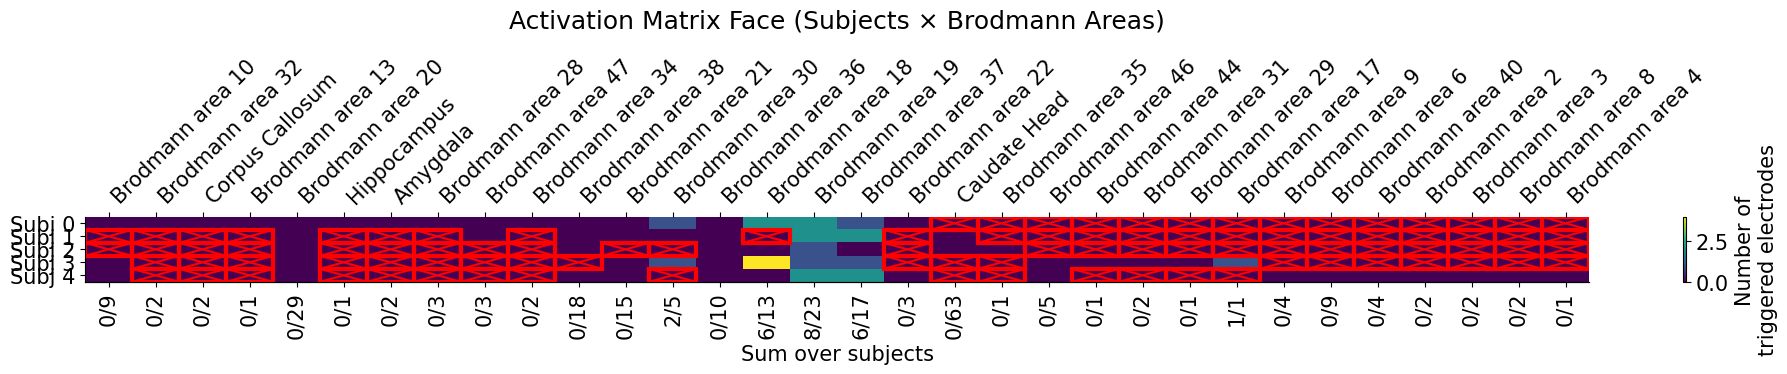

(5, 32)
(32,)


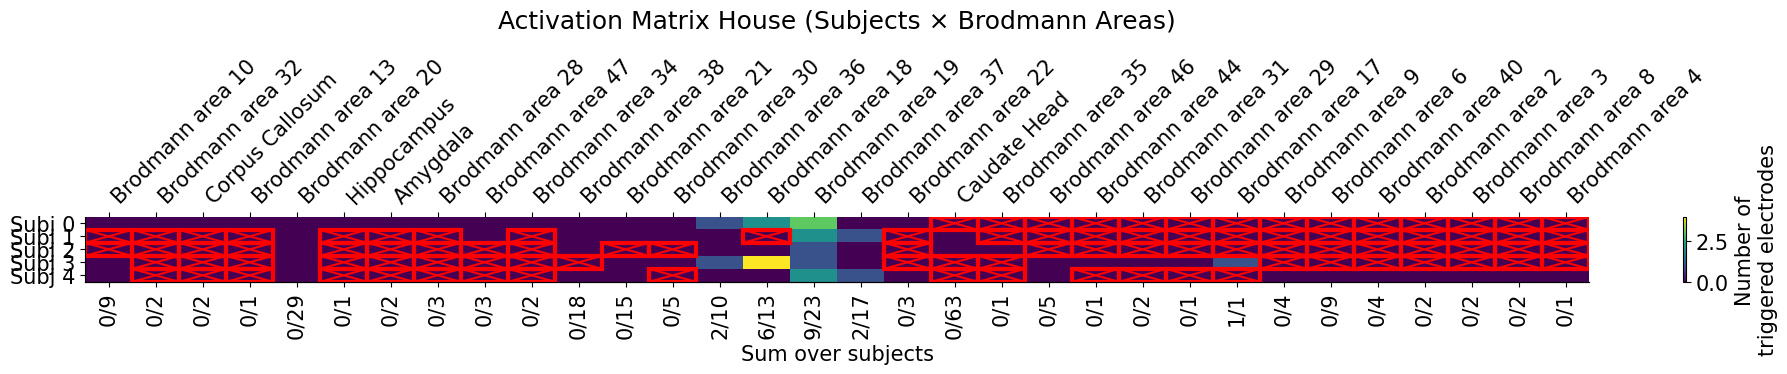

In [10]:
show_activation_matrix(activation_matrix_face, present_areas_matrix, "Activation Matrix Face")
show_activation_matrix(activation_matrix_house, present_areas_matrix, "Activation Matrix House")

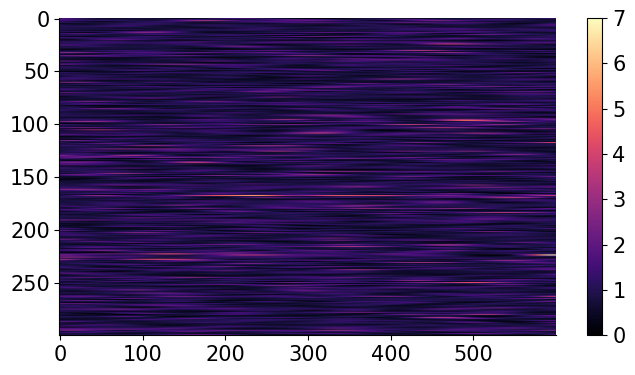

In [11]:
# let's look at all the face trials for electrode 46 that has a good response to faces
# we will sort trials by stimulus id (1-50 is houses, 51-100 is faces)
plt.subplot(1, 3, 1)
isort = np.argsort(dat1['stim_id'])
plt.imshow(V_epochs[isort, :, 46].astype('float32'),
           aspect='auto', vmax=7, vmin=0,
           cmap='magma')
plt.colorbar()
plt.show()

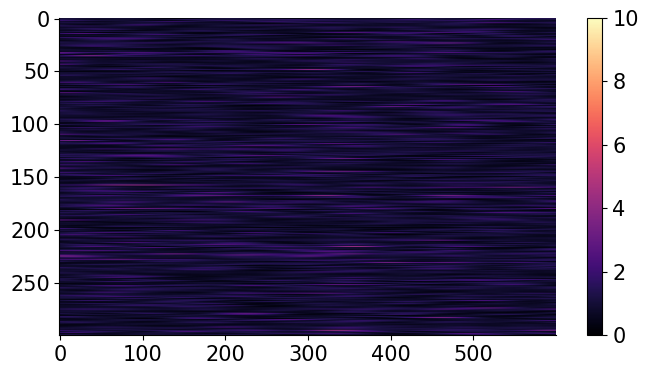

In [12]:
# Electrode 43 seems to respond to houses
isort = np.argsort(dat1['stim_id'])
plt.subplot(1, 3, 1)
plt.imshow(V_epochs[isort, :, 43].astype('float32'),
           aspect='auto', vmax=10, vmin=0,
           cmap='magma')
plt.colorbar()
plt.show()

In [19]:
!pip install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.4 MB/s eta 0:00:00


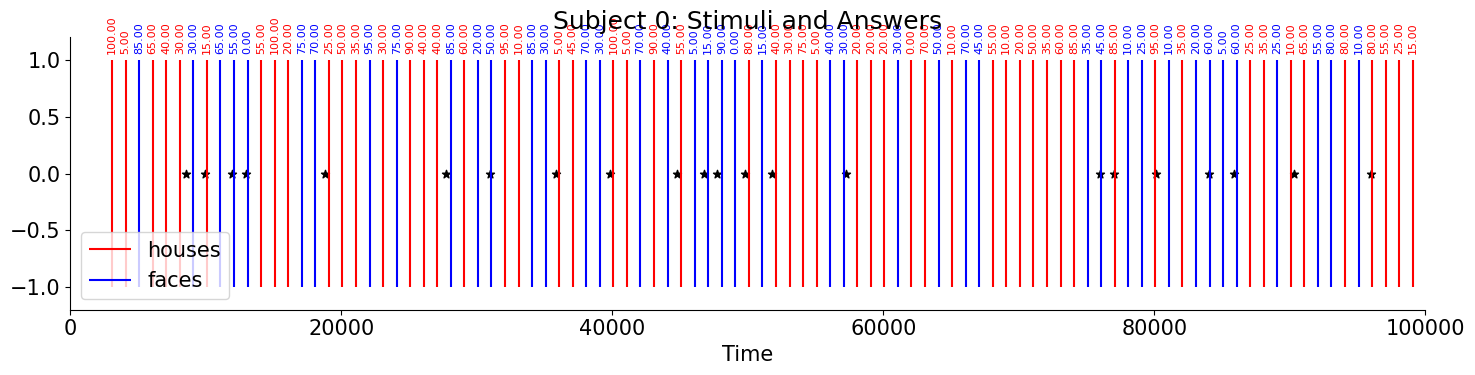

<Figure size 2000x400 with 0 Axes>

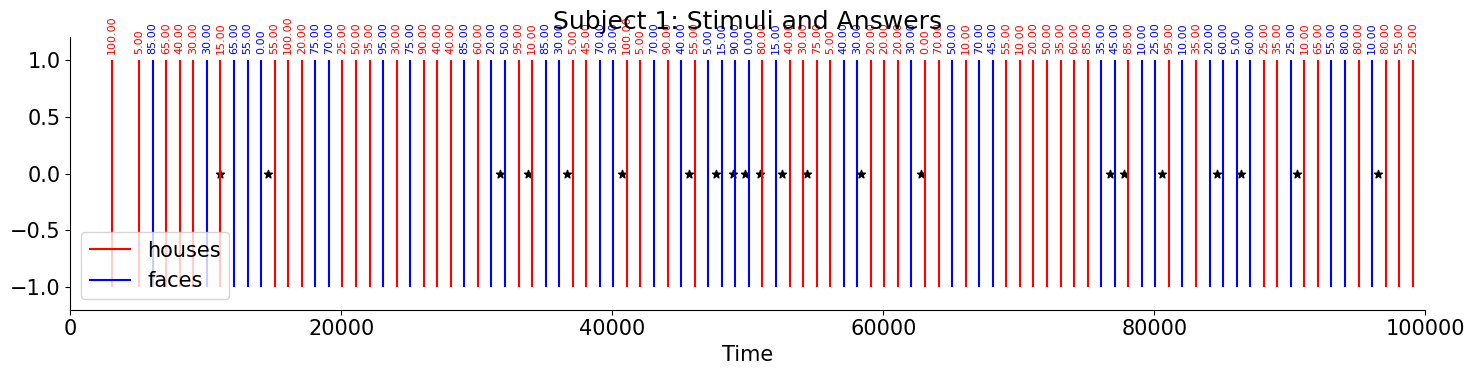

<Figure size 2000x400 with 0 Axes>

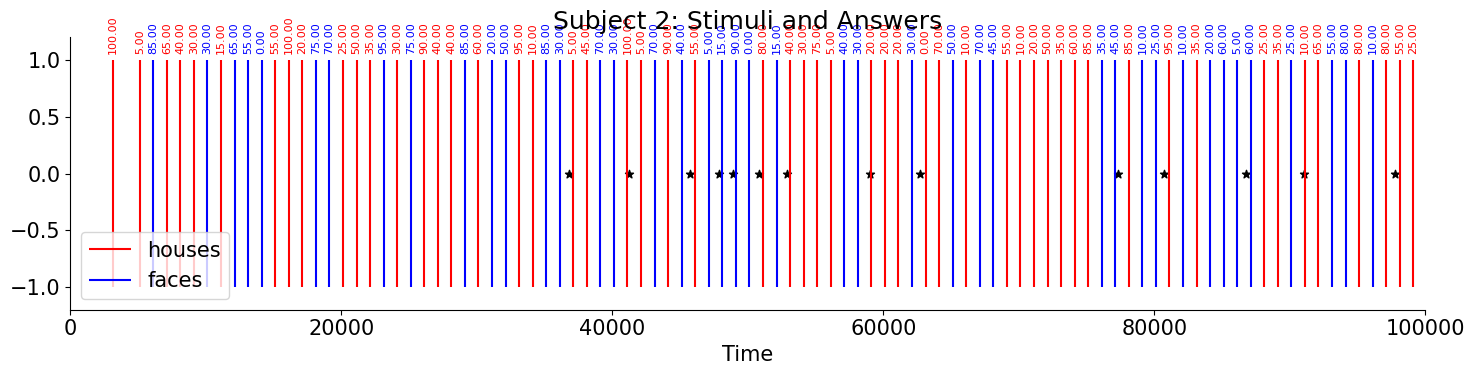

<Figure size 2000x400 with 0 Axes>

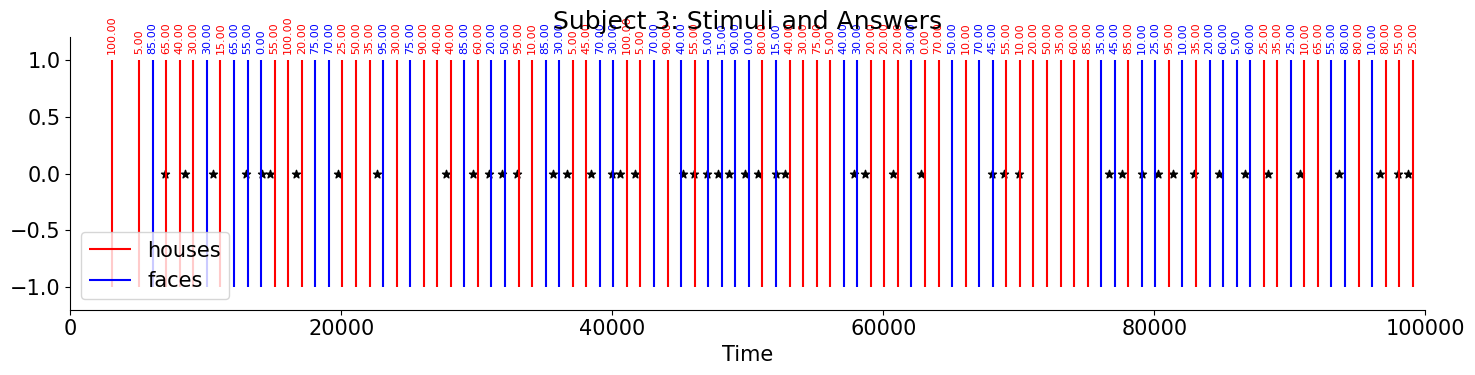

<Figure size 2000x400 with 0 Axes>

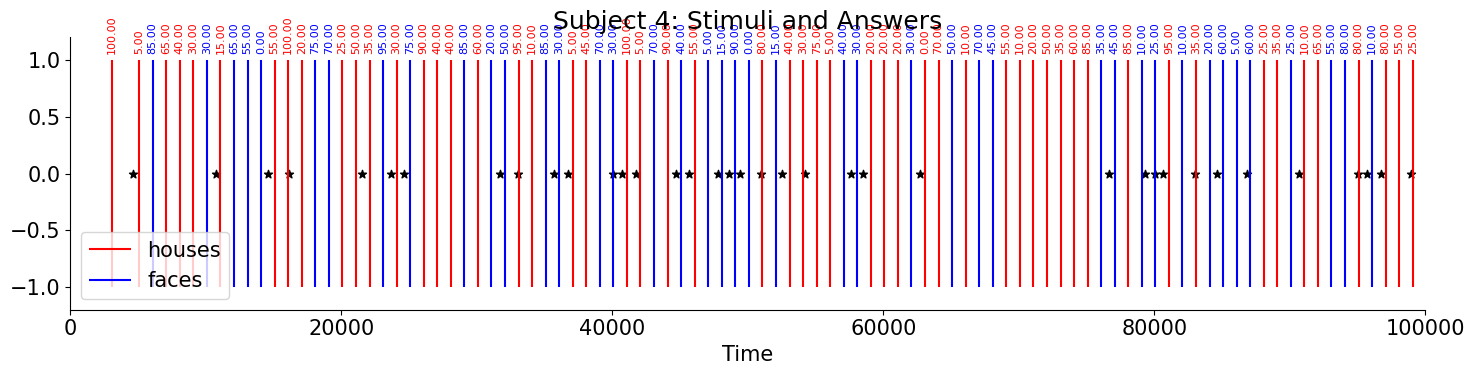

<Figure size 2000x400 with 0 Axes>

In [26]:
subjects2_kept = [subjects2[j] for j in [0, 3, 4, 5, 6]]
lim1 = 0
lim2 = 100000

for i, subject in enumerate(subjects2_kept):
    house_on = subject['t_on'].flatten()[subject["stim_cat"].flatten() == 1]
    house_select = (house_on >= lim1) & (house_on <= lim2)
    house_on = house_on[house_select]
    house_off = subject['t_off'].flatten()[subject["stim_cat"].flatten() == 1][house_select]
    house_noise = subject['stim_noise'].flatten()[subject["stim_cat"].flatten() == 1][house_select]

    face_on = subject['t_on'].flatten()[subject["stim_cat"].flatten() == 2]
    face_select = (face_on >= lim1) & (face_on <= lim2)
    face_on = face_on[face_select]
    face_off = subject['t_off'].flatten()[subject["stim_cat"].flatten() == 2][face_select]
    face_noise = subject['stim_noise'].flatten()[subject["stim_cat"].flatten() == 2][face_select]

    answers = subject["key_press"].flatten()
    answers_select = (answers >= lim1) & (answers <= lim2)
    answers = answers[answers_select]

    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot()

    ax.vlines(house_on, -1, 1, colors="red", label='houses')
    ax.vlines(face_on, -1, 1, colors="blue", label="faces")

    # Annotate noise levels
    for t, n in zip(house_on, house_noise):
        ax.text(t, 1.05, f"{n:.2f}", color='red', fontsize=8, rotation=90, ha='center', va='bottom')

    for t, n in zip(face_on, face_noise):
        ax.text(t, 1.05, f"{n:.2f}", color='blue', fontsize=8, rotation=90, ha='center', va='bottom')

    ax.scatter(answers, np.zeros(answers.shape), marker="*", color="black")
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlim(lim1, lim2)
    ax.set_title(f"Subject {i}: Stimuli and Answers")
    ax.set_xlabel("Time")
    plt.tight_layout()
    plt.legend()
    plt.show()
    plt.clf()


/tmp/ipython-input-43-769802041.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', num_subjects)


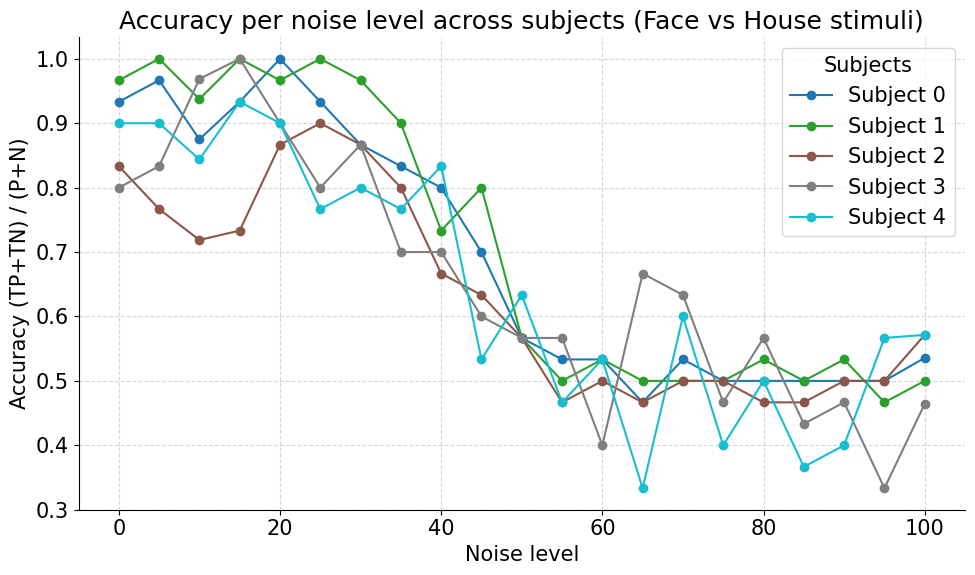

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Create a color map for different subjects
num_subjects = len(subjects2_kept)
colors = cm.get_cmap('tab10', num_subjects)

# Prepare the figure
plt.figure(figsize=(10, 6))

all_subjects_accuracies = []

for i, subject in enumerate(subjects2_kept):
    # Extract face stimuli
    face_on = subject['t_on'].flatten()[subject["stim_cat"].flatten() == 2]
    face_noise = subject['stim_noise'].flatten()[subject["stim_cat"].flatten() == 2]

    # Extract house stimuli
    house_on = subject['t_on'].flatten()[subject["stim_cat"].flatten() == 1]
    house_noise = subject['stim_noise'].flatten()[subject["stim_cat"].flatten() == 1]

    # Extract answer times
    answers = subject["key_press"].flatten()
    stimuli_answers = np.zeros(subject['t_on'].flatten().shape, dtype=bool)
    for k in range(len(subject['t_on'].flatten())):
        t_start = subject['t_on'].flatten()[k] + 200
        t_end = subject['t_on'].flatten()[k] + 1200
        if np.any((answers > t_start) & (answers <= t_end)):
            stimuli_answers[k] = True

    face_answers = stimuli_answers[subject["stim_cat"].flatten() == 2]
    house_answers = stimuli_answers[subject["stim_cat"].flatten() == 1]

    # Group by noise level
    unique_noise_levels = np.unique(subject['stim_noise'].flatten())
    accuracy_counts = []

    for noise in unique_noise_levels:
        mask_face = face_noise == noise
        mask_house = house_noise == noise
        TP = np.sum(face_answers[mask_face])
        FP = np.sum(house_answers[mask_house])
        TN = np.sum(~house_answers[mask_house])
        P = np.sum(mask_face)
        N = np.sum(mask_house)
        accuracy = (TP + TN) / (P + N)
        accuracy_counts.append(accuracy)

    # Plot on the same figure
    all_subjects_accuracies.append(accuracy_counts)
    plt.plot(unique_noise_levels, accuracy_counts, marker='o', color=colors(i), label=f"Subject {i}")

# Final plot formatting
plt.xlabel("Noise level")
plt.ylabel("Accuracy (TP+TN) / (P+N)")
plt.title("Accuracy per noise level across subjects (Face vs House stimuli)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Subjects")
plt.tight_layout()
plt.show()


/tmp/ipython-input-67-2730394370.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', num_subjects)


Subject 0
S0
T=42.9
S=0.2
C=0.50
L=0.06
R²=0.98
Subject 1
S1
T=43.1
S=0.2
C=0.50
L=0.02
R²=0.97
Subject 2
S2
T=43.1
S=0.3
C=0.50
L=0.19
R²=0.91
Subject 3
S3
T=39.3
S=0.1
C=0.49
L=0.09
R²=0.82
Subject 4
S4
T=42.6
S=0.2
C=0.47
L=0.12
R²=0.84


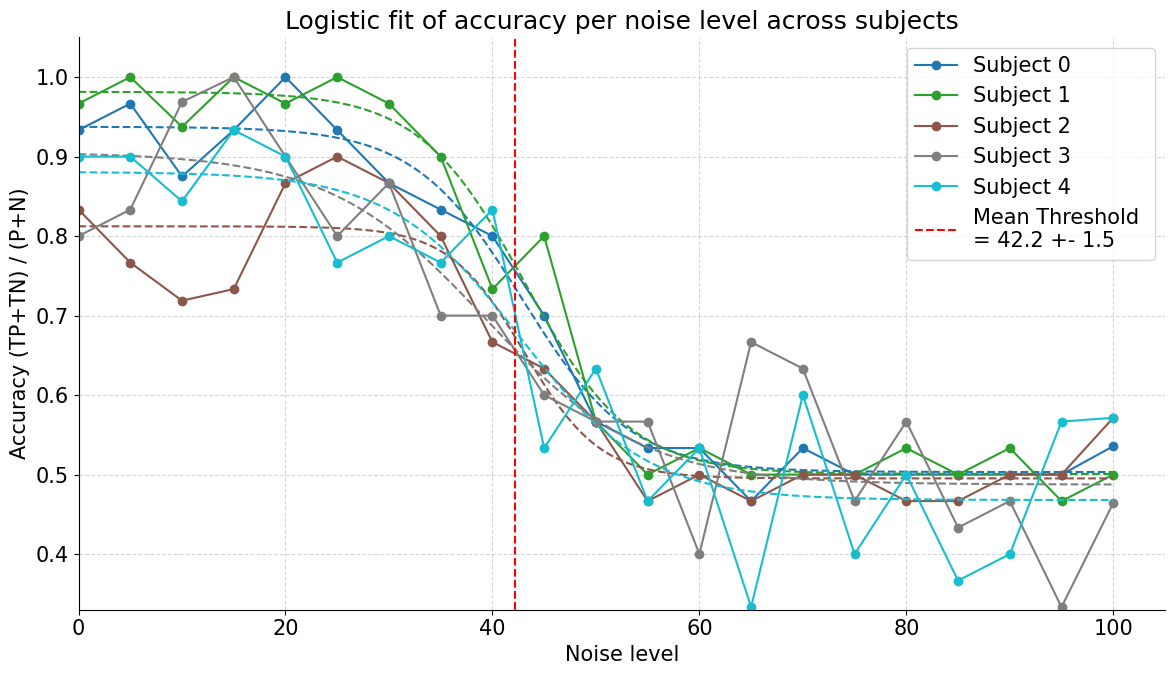

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import scipy.optimize as opt

def logistic(x, threshold, slope, chance_level, lapse_level):
    return (1 - lapse_level - chance_level) / (1. + np.exp(slope * (x - threshold))) + chance_level

# Create a color map for different subjects
num_subjects = len(subjects2_kept)
colors = cm.get_cmap('tab10', num_subjects)

# Prepare the figure
plt.figure(figsize=(12, 7))

all_subjects_parameters = []

for i, subject in enumerate(subjects2_kept):
    current_accuracy = all_subjects_accuracies[i]
    noise_levels = np.arange(0, 105, 5)  # 0 to 100 in steps of 5

    try:
        # Fit logistic curve
        p0 = [50, 0.5, 0.5, 0.1]
        popt, pcov = opt.curve_fit(logistic, noise_levels, current_accuracy, p0=p0, method="trf")
        all_subjects_parameters.append(popt)

        # Generate data points for plotting
        x = np.linspace(0, 100, 200)
        log_reg = logistic(x, *popt)

        # Compute R²
        residuals = current_accuracy - logistic(noise_levels, *popt)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((current_accuracy - np.mean(current_accuracy))**2)
        r_squared = 1 - (ss_res / ss_tot)

        # Plot data and fit
        print(f"Subject {i}")
        print(f"S{i}\nT={popt[0]:.1f}\nS={popt[1]:.1f}\nC={popt[2]:.2f}\nL={popt[3]:.2f}\nR²={r_squared:.2f}")
        print("=========")
        plt.plot(noise_levels, current_accuracy, marker='o', color=colors(i), label=f"Subject {i}")
        plt.plot(x, log_reg, color=colors(i), linestyle='--')

        # Annotate fit parameters
        text_x = 102
        text_y = log_reg[-1]
    except Exception as e:
        print(f"Fit failed for Subject {i}: {e}")
        plt.plot(noise_levels, current_accuracy, marker='x', linestyle='-', color=colors(i), label=f"Subject {i} (fit failed)")

# Finalize plot
all_subjects_parameters = np.array(all_subjects_parameters)
mean_parameters = np.mean(all_subjects_parameters, axis=0)
std_parameters = np.std(all_subjects_parameters, axis=0)
plt.vlines(mean_parameters[0], 0, 1.5, linestyle='--', color='red', label=f'Mean Threshold \n= {mean_parameters[0]:.1f} +- {std_parameters[0]:.1f}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Noise level")
plt.ylabel("Accuracy (TP+TN) / (P+N)")
plt.title("Logistic fit of accuracy per noise level across subjects")
plt.xlim(0, 105)
plt.ylim(0.33, 1.05)
plt.tight_layout()
plt.show()
